<a href="https://colab.research.google.com/github/asrianda/pemograman/blob/main/ID3_C4_5/TestC4_5_dan_Id3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pprint

In [2]:
df=pd.read_csv('data.csv')
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [3]:
missing_value=df.isnull().sum()
missing_value

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

**Menggunakan Decoding**

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_hot=pd.get_dummies(df)
df_hot

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,gender_Female,gender_Male,interest_Interested,interest_Less Interested,interest_Not Interested,interest_Uncertain,interest_Very Interested,residence_Rural,residence_Urban
0,56,6950000,83.0,84.09,False,True,True,False,True,False,False,True,False,True,False,False,False,False,True
1,57,4410000,76.8,86.91,False,True,True,False,True,False,False,True,False,True,False,False,False,False,True
2,50,6500000,80.6,87.43,False,True,True,False,False,True,True,False,False,False,False,False,True,False,True
3,49,6600000,78.2,82.12,True,True,False,True,False,True,False,True,False,False,False,False,True,True,False
4,57,5250000,75.1,86.79,False,False,True,False,True,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49,7420000,63.6,85.99,True,True,False,True,True,False,True,False,False,False,False,False,True,True,False
996,51,7480000,84.3,89.72,True,True,True,False,False,True,True,False,False,True,False,False,False,True,False
997,49,5550000,75.2,79.56,False,True,False,True,True,False,False,True,False,True,False,False,False,False,True
998,53,5840000,105.8,87.18,True,True,True,False,False,True,False,True,False,False,False,True,False,True,False


In [5]:
df_scaled=pd.DataFrame(scaler.fit_transform(df_hot),columns=df_hot.columns)
df_scaled.describe()

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,gender_Female,gender_Male,interest_Interested,interest_Less Interested,interest_Not Interested,interest_Uncertain,interest_Very Interested,residence_Rural,residence_Urban
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.0000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.689582e-16,1.065814e-17,-6.910028e-16,-4.401812e-15,-1.421085e-17,0.0000,3.552714e-18,-3.552714e-18,-3.730349e-17,3.730349e-17,2.708944e-17,-2.708944e-17,-3.552714e-17,-6.039613e-17,8.881784e-17,-2.486900e-17,-7.993606e-17,-3.552714e-17,-7.638334e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.0005,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.489320e+00,-3.136757e+00,-3.566426e+00,-3.286065e+00,-1.040833e+00,-1.0000,-1.248016e+00,-8.012716e-01,-9.626953e-01,-1.038750e+00,-9.704368e-01,-1.030464e+00,-3.333333e-01,-5.449925e-01,-3.067440e-01,-5.942895e-01,-6.923077e-01,-9.248176e-01,-1.081294e+00
25%,-6.310958e-01,-7.313400e-01,-6.486652e-01,-6.987462e-01,-1.040833e+00,-1.0000,-1.248016e+00,-8.012716e-01,-9.626953e-01,-1.038750e+00,-9.704368e-01,-1.030464e+00,-3.333333e-01,-5.449925e-01,-3.067440e-01,-5.942895e-01,-6.923077e-01,-9.248176e-01,-1.081294e+00
50%,-5.945106e-02,4.182992e-02,6.441970e-02,-1.546321e-01,9.607689e-01,0.0000,8.012716e-01,-8.012716e-01,-9.626953e-01,9.626953e-01,-9.704368e-01,9.704368e-01,-3.333333e-01,-5.449925e-01,-3.067440e-01,-5.942895e-01,-6.923077e-01,-9.248176e-01,9.248176e-01
75%,5.121937e-01,7.165638e-01,6.744671e-01,6.411812e-01,9.607689e-01,1.0000,8.012716e-01,1.248016e+00,1.038750e+00,9.626953e-01,1.030464e+00,9.704368e-01,-3.333333e-01,-5.449925e-01,-3.067440e-01,1.682682e+00,1.444444e+00,1.081294e+00,9.248176e-01
max,3.656240e+00,3.306325e+00,2.975638e+00,3.524616e+00,9.607689e-01,1.0000,8.012716e-01,1.248016e+00,1.038750e+00,9.626953e-01,1.030464e+00,9.704368e-01,3.000000e+00,1.834888e+00,3.260047e+00,1.682682e+00,1.444444e+00,1.081294e+00,9.248176e-01


In [6]:
df_scaled

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,gender_Female,gender_Male,interest_Interested,interest_Less Interested,interest_Not Interested,interest_Uncertain,interest_Very Interested,residence_Rural,residence_Urban
0,1.083838,1.122836,0.555074,-0.594365,-1.040833,1.0,0.801272,-0.801272,1.038750,-1.038750,-0.970437,0.970437,-0.333333,1.834888,-0.306744,-0.594289,-0.692308,-0.924818,0.924818
1,1.369661,-0.695545,0.149467,0.240684,-1.040833,1.0,0.801272,-0.801272,1.038750,-1.038750,-0.970437,0.970437,-0.333333,1.834888,-0.306744,-0.594289,-0.692308,-0.924818,0.924818
2,-0.631096,0.800682,0.398065,0.394664,-1.040833,1.0,0.801272,-0.801272,-0.962695,0.962695,1.030464,-1.030464,-0.333333,-0.544993,-0.306744,-0.594289,1.444444,-0.924818,0.924818
3,-0.916918,0.872272,0.241055,-1.177715,0.960769,1.0,-1.248016,1.248016,-0.962695,0.962695,-0.970437,0.970437,-0.333333,-0.544993,-0.306744,-0.594289,1.444444,1.081294,-1.081294
4,1.369661,-0.094191,0.038251,0.205150,-1.040833,-1.0,0.801272,-0.801272,1.038750,-1.038750,1.030464,-1.030464,-0.333333,-0.544993,-0.306744,-0.594289,1.444444,-0.924818,0.924818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.916918,1.459308,-0.714086,-0.031744,0.960769,1.0,-1.248016,1.248016,1.038750,-1.038750,1.030464,-1.030464,-0.333333,-0.544993,-0.306744,-0.594289,1.444444,1.081294,-1.081294
996,-0.345273,1.502262,0.640121,1.072771,0.960769,1.0,0.801272,-0.801272,-0.962695,0.962695,1.030464,-1.030464,-0.333333,1.834888,-0.306744,-0.594289,-0.692308,1.081294,-1.081294
997,-0.916918,0.120579,0.044794,-1.935773,-1.040833,1.0,-1.248016,1.248016,1.038750,-1.038750,-0.970437,0.970437,-0.333333,1.834888,-0.306744,-0.594289,-0.692308,-0.924818,0.924818
998,0.226371,0.328189,2.046665,0.320635,0.960769,1.0,0.801272,-0.801272,-0.962695,0.962695,-0.970437,0.970437,-0.333333,-0.544993,-0.306744,1.682682,-0.692308,1.081294,-1.081294


<Axes: >

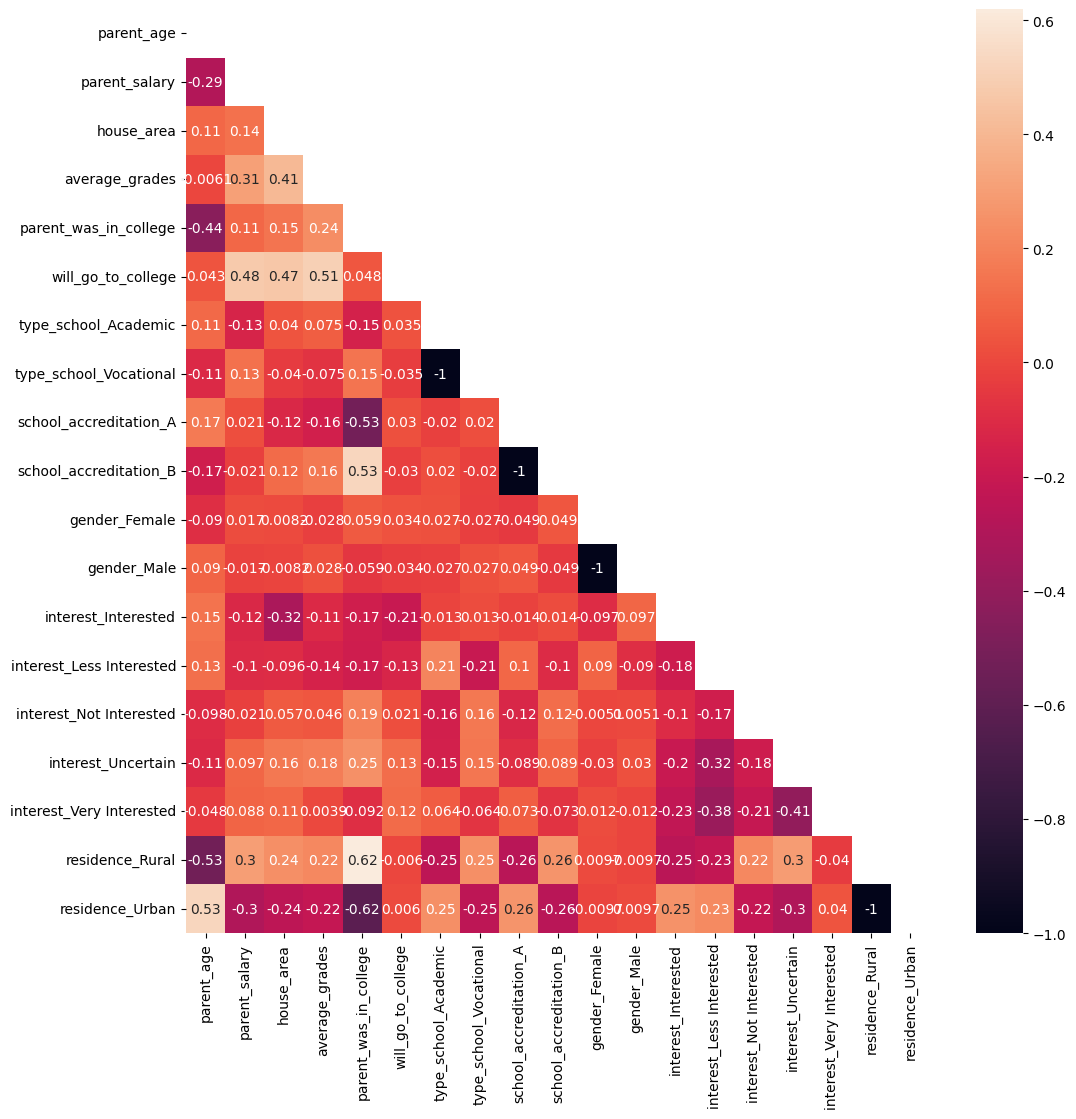

In [7]:
corr=df_hot.corr()
m=np.triu(corr)
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,mask=m)

<Axes: xlabel='None'>

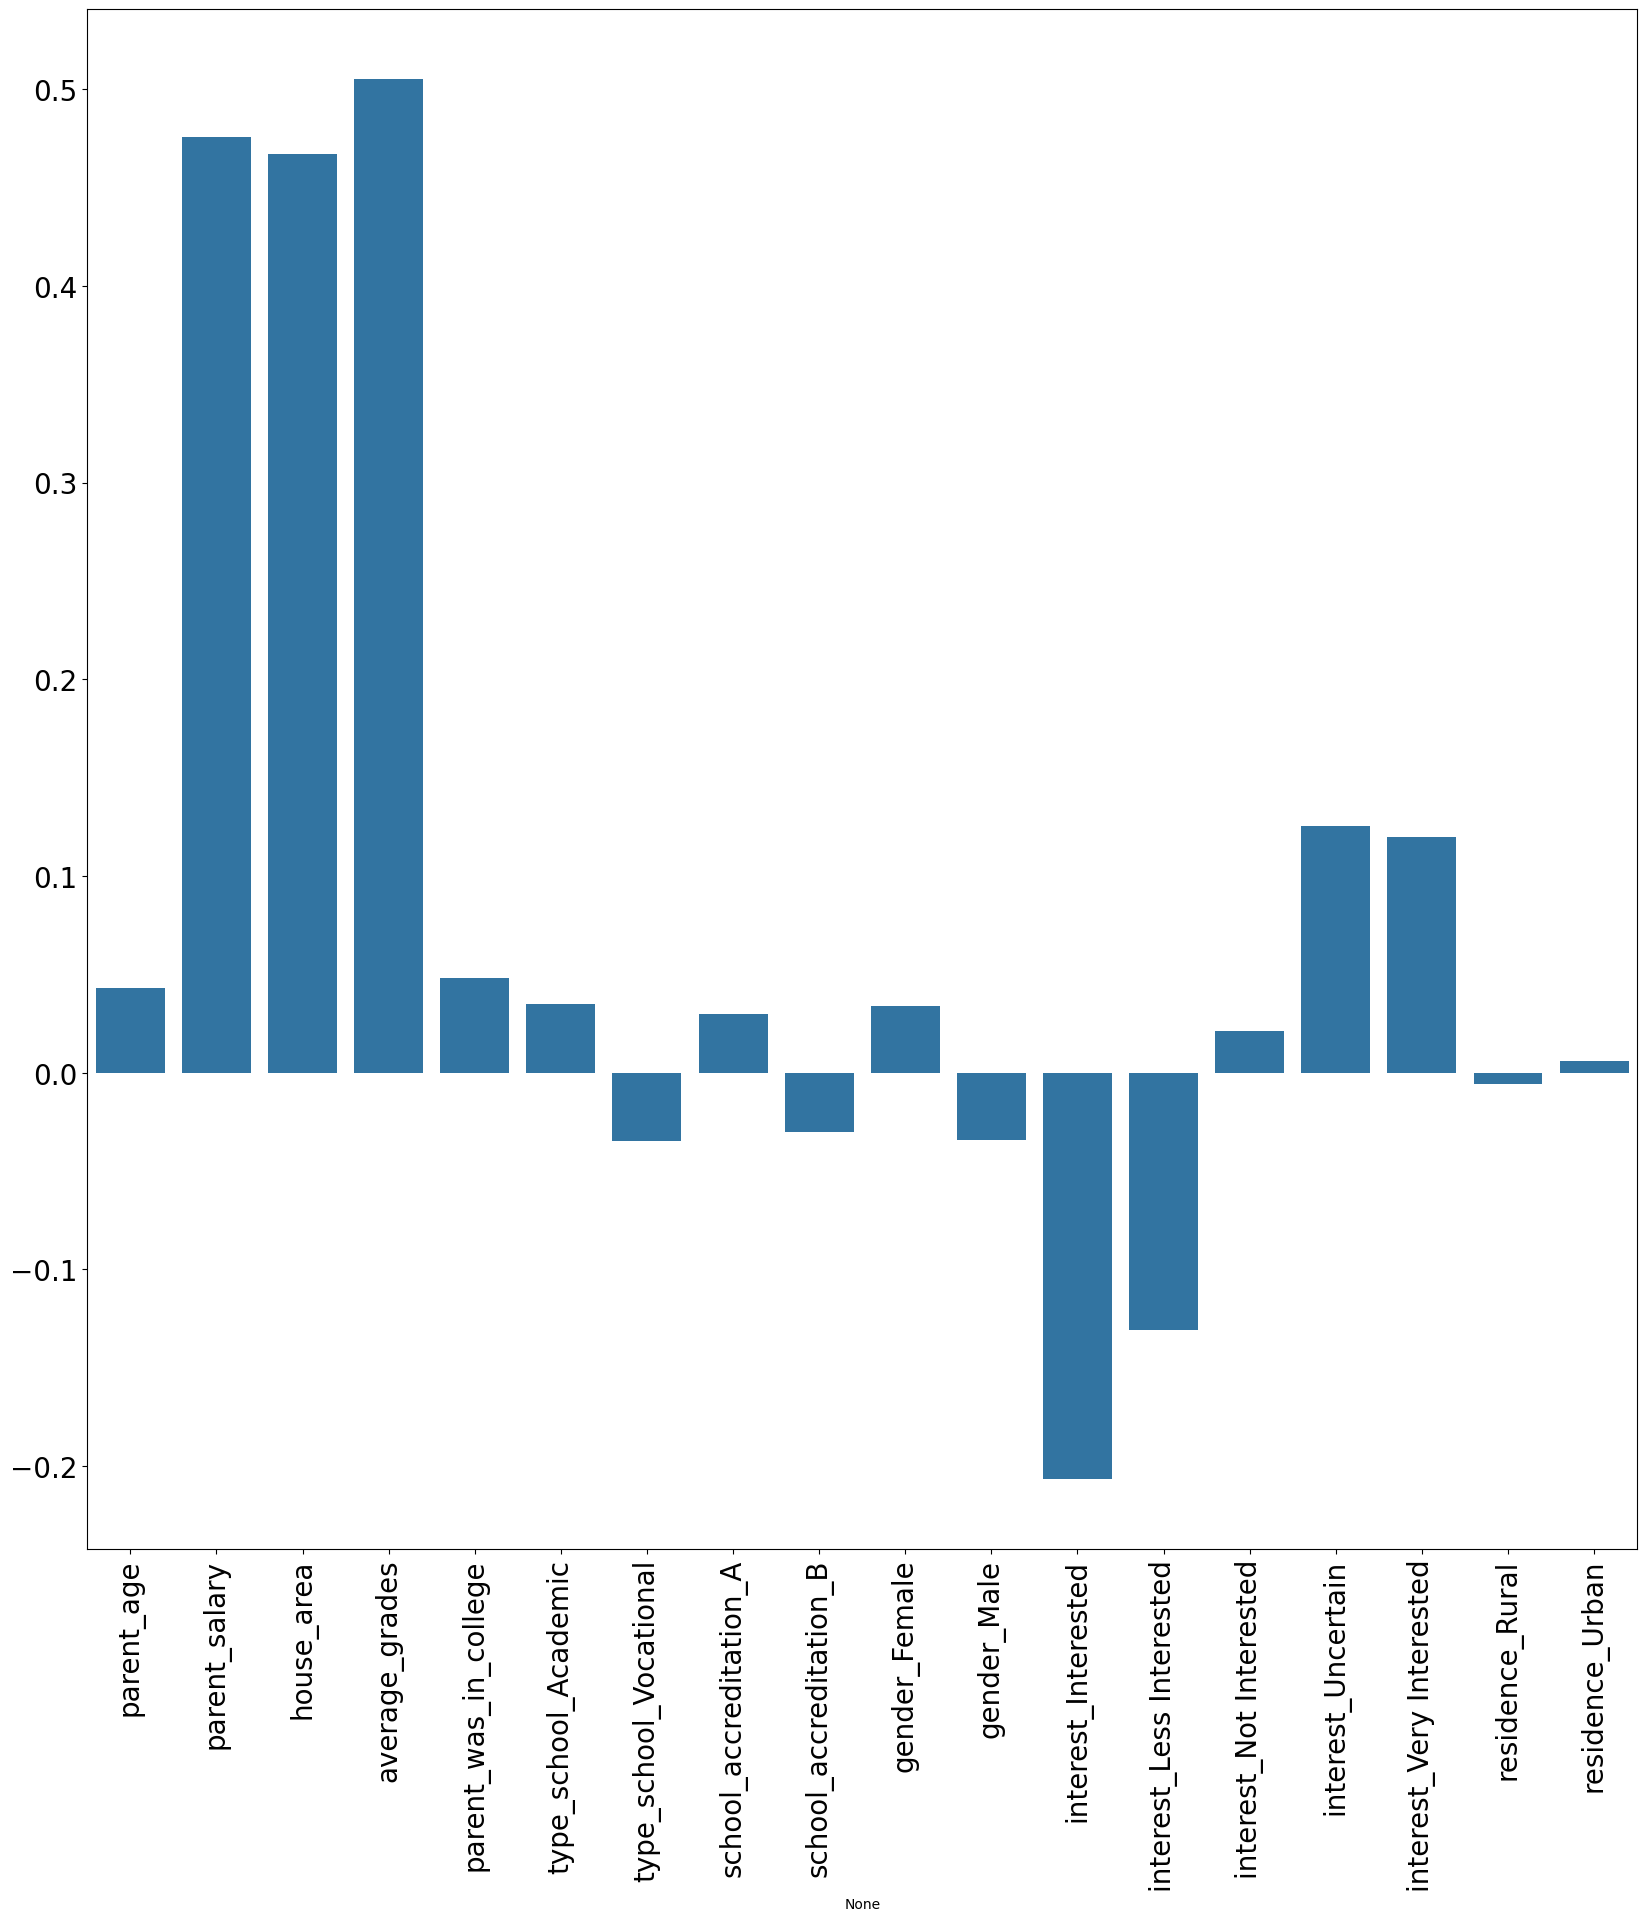

In [8]:
plt.figure(figsize=(20,20))
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
correlation=corr['will_go_to_college']
#correlation=correlation.drop(index='will_go_to_college',axis=0)
correlation = correlation.drop(index= 'will_go_to_college', axis =0 )
sns.barplot(x=correlation.index,y=correlation.values)

In [9]:
#-- Diskritisasi semua kolom menjadi 4 nampan dengan lebar yang sama
for coll in (['parent_age','parent_salary','house_area','average_grades']):
  df[coll]=pd.cut(df[coll],bins=4,labels=False)
df.head(4)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,2,2,2,1,False,True
1,Academic,A,Male,Less Interested,Urban,2,1,2,2,False,True
2,Academic,B,Female,Very Interested,Urban,1,2,2,2,False,True
3,Vocational,B,Male,Very Interested,Rural,1,2,2,1,True,True


In [10]:
df_org=pd.read_csv('data.csv')

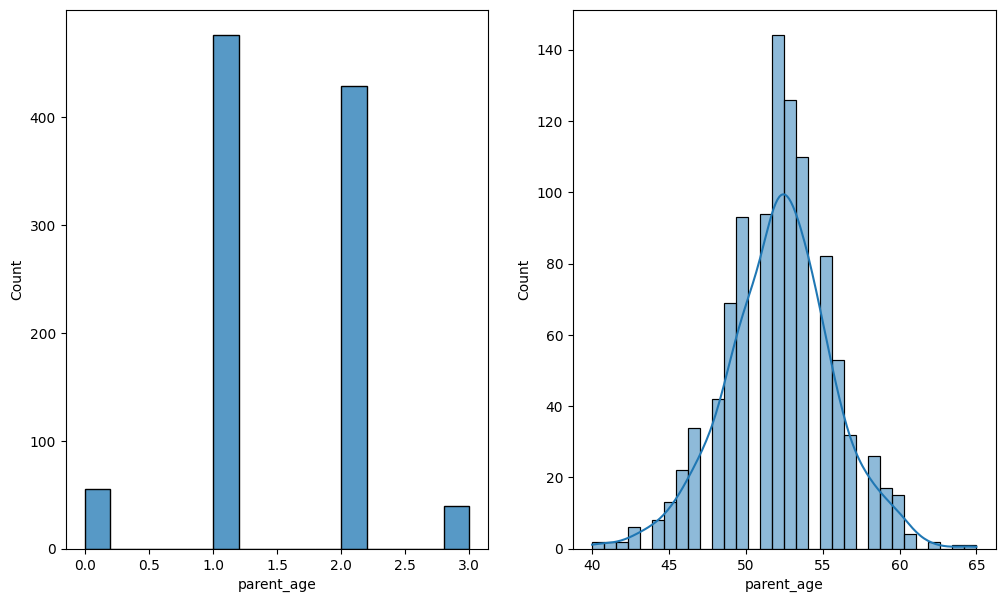

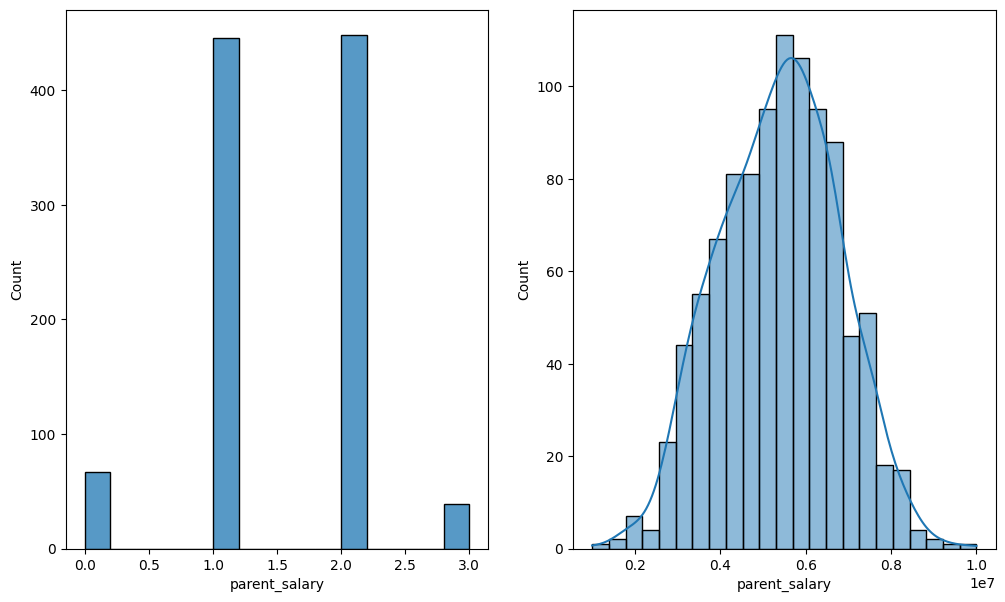

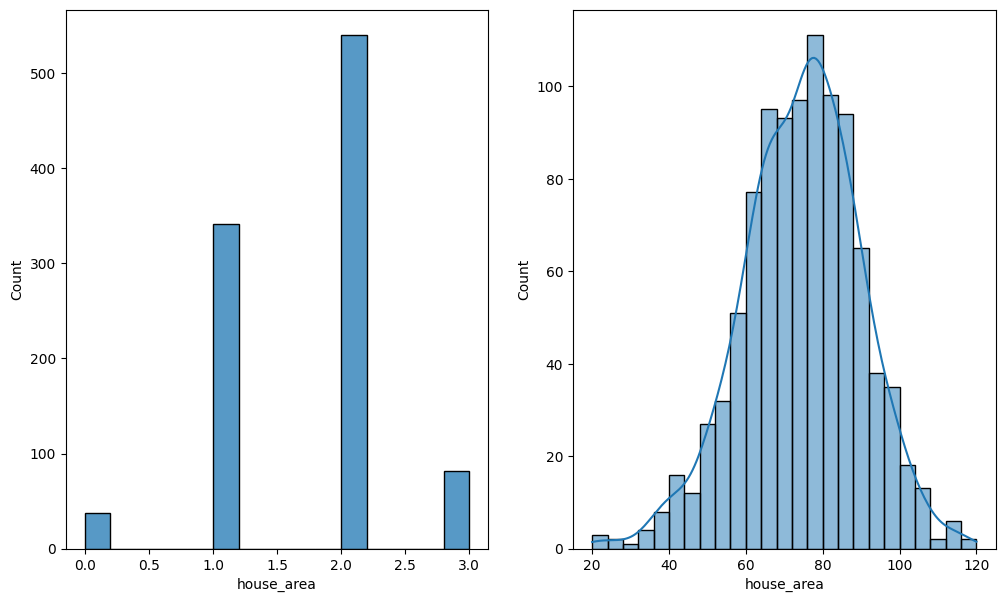

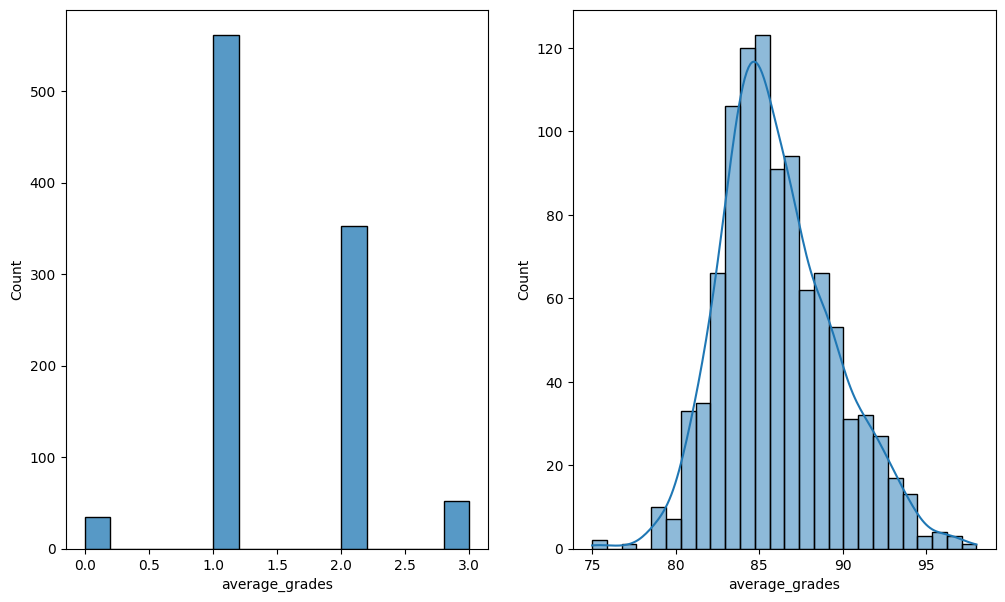

In [11]:
for col in ['parent_age','parent_salary','house_area','average_grades']:
  plt.figure(figsize=(12,7))
  data=df[col]
  data2=df_org[col]
  plt.subplot(1,2,1)
  sns.histplot(data)
  plt.subplot(1,2,2)
  sns.histplot(data2,kde=True)
  plt.show()

# Membagi data **Training** dan data **Test**

In [12]:
from sklearn.model_selection import train_test_split
X=df
y=df.iloc[:,-1]
train,tes,_, _,=train_test_split(X,y,test_size=0.15,random_state=78)
print('Data Training X=',len(train))
print('Data Testing X=',len(tes))
#print('Data Training Y=',len(trainY))
#print('Data Testing y=',len(tesY))

Data Training X= 850
Data Testing X= 150


## Implementasi ID3 Tree
# Menghitung Parameter *split*

In [13]:
#-- Fungsi untuk menghitung Entropi --
def entropy(data,label='will_go_to_college'):
  counts=data[label].value_counts() #-- Mengembalikan nilai disetiap kategori
  total=len(data)
  entropy=0

  for value in counts:
    prob=value/total
    entropy=entropy-prob * np.log2(prob) #-- diakhir positiv untuk pengulangan df(). --
  return entropy


#-- Menghitung Information Gain --
def cal_info_gain(data):
  base_entropy=entropy(data)
  total=len(data)

  info_gain=[] #-- untuk penyimpanan setiap split pohon --

  for column in data.columns[:-1]:
    atribute_values=data[column].unique() #-- Mendapatkan disetiap nilai atribut --
    new_entropy=0.0


    for value in atribute_values:
      subset=data[data[column]==value]
      prob=len(subset)/total
      new_entropy+=prob*entropy(subset)

    info_gain.append([column,base_entropy-new_entropy])
  return info_gain

#-- Cek Fungsi info Gain --
print(cal_info_gain(df))

[['type_school', 0.0008756968251206754], ['school_accreditation', 0.0006502498518179411], ['gender', 0.0008347905049521653], ['interest', 0.05521813009236798], ['residence', 2.6127631853833932e-05], ['parent_age', 0.007837867136231691], ['parent_salary', 0.1481582697143876], ['house_area', 0.14960114272715186], ['average_grades', 0.22919509734104793], ['parent_was_in_college', 0.0016652930806921873]]


## Membangun Pohon

In [14]:
from posixpath import split
#-- Membuat pohon secara rekursif dan menyimpan dalam format {'col_name':{'split_attr':{}} --
def build_tree_ID3(data, root=None):
  global split
  label='will_go_to_college'

  info_gain=cal_info_gain(data)
  info_gain=sorted(info_gain, key=lambda x:x[1], reverse =True)
  column_name=info_gain[0][0] #-- Melakukan pembagian split yang terbaik
  #print('Kolom: ',column_name)

  root={column_name: {}}

  for attr in data[column_name].unique():
    #print(attr)
    new_data=data[data[column_name]==attr]
    new_data=new_data.drop(column_name, axis=1) #-- hapus kolum yang telah digunakan untuk split --

    if len(new_data.columns)<2:  #-- jika data ter split pada setiap kolum dan masih kotor --
      count=new_data[label].value_counts()
      count=count.sort_values(ascending=False)
      root[column_name][attr]=count.index[0]

    elif len(new_data)>1 and len(new_data[label].unique())>1:
      new=build_tree_ID3(new_data, root) #-- memanggil fungsinya sendiri  untuk meng split lebih lanjut

      root[column_name][attr]=new

    else:
      output=new_data[label].unique()
      root[column_name][attr]=output[0]

  return root



## Implementasi C4.5
## Melakukan perhitungan parameter untuk split

In [64]:
#Calculate gain
def Gain(data):
    base_entropy = entropy(data)
    total = len(data)

    gain =[]  #stores info gain for each attrib when a tree is splitted

    for column in data.columns[:-1]:

        attribute_values = data[column].unique()  # get each attribute value
        new_entropy = 0.0


        for value in attribute_values:
            subset = data[data[column] == value]
            prob = len(subset)/total
            new_entropy += prob*entropy(subset)

        gain.append([column, base_entropy-new_entropy])

    return gain


#function check
print(cal_info_gain(df))


[['type_school', 0.0008756968251206754], ['school_accreditation', 0.0006502498518179411], ['gender', 0.0008347905049521653], ['interest', 0.05521813009236798], ['residence', 2.6127631853833932e-05], ['parent_age', 0.007837867136231691], ['parent_salary', 0.1481582697143876], ['house_area', 0.14960114272715186], ['average_grades', 0.22919509734104793], ['parent_was_in_college', 0.0016652930806921873]]


In [57]:
# implementation of c4.5

def split_info(data):
    total = len(data)

    split_info_ =[]  #stores info gain for each attrib when a tree is splitted

    for column in data.columns[:-1]:

        attribute_values = data[column].unique()  # get each attribute value
        split_info_att = 0.0  #split info for an attribute


        for value in attribute_values:
            subset = data[data[column] == value]
            prob = len(subset)/total
            split_info_att -= prob * np.log2(prob)

        split_info_.append([column, split_info_att])

    return split_info_


#gainratio = gain/splitinfo
def gain_ratio(data):
    gain = Gain(data)
    splitinfo = split_info(data)
    gain = np.array(gain)
    splitinfo = np.array(splitinfo)

    gain_ratio_ = list()   #stores gain ratio for every attribute

# #     for attr in gain[:, 0]:   #looping throuhg all attributes
# #         ratio = gain[:, 1]/split_info[:, 1]
#     try:
#         ratio = np.divide(gain[:, 1].astype(np.float64), splitinfo[:, 1].astype(np.float64))
#     except:
#         ratio =[]

    for a, b in zip(gain, splitinfo):
        if float(b[1])==0:  #handaling zero cases
            ratio =0
        else:
            ratio = float(a[1])/float(b[1])

        gain_ratio_.append([a[0], ratio])

    return gain_ratio_

## Membangun Pohon

In [70]:
#-- Membangun pohon dengan memanggil fungsinya sendiri dengan format {'col_name':{'split_attr':{}} --
split_information = []  #Only to check, how tree is splitting, testing
def build_tree_C4_5(data, root=None):
    global split_info
    label = 'will_go_to_college'

    gain_ratio_ = gain_ratio(data)
    gain_ratio_ = sorted(gain_ratio_, key=lambda x: x[1], reverse=True)
    column_name = gain_ratio_[0][0]    #best column to split on
    #print('Col:', column_name)

    split_information.append(column_name)
    root = {column_name: {}}

    for attr in data[column_name].unique():
        #print(attr)
        new_data = data[data[column_name] == attr]
        new_data = new_data.drop(column_name, axis=1)  # Drop the column used for splitting

        if len(new_data.columns) < 2:  #If the data is splitted in all columns and still is impure
            count = new_data[label].value_counts()
            count = count.sort_values(ascending=False)
            root[column_name][attr] = count.index[0]

        elif len(new_data) > 1 and len(new_data[label].unique()) > 1:
            new = build_tree_C4_5(new_data, root)  #Recusive call for further splitting
            root[column_name][attr] = new

        else:
            output = new_data[label].unique()
            root[column_name][attr] = output[0]

    return root

## Decision Tree Inference

In [72]:
#-- Membuat keputusan dengan menggunakan tree --
def predict_decision_tree(data_point, decision_tree):
  node=decision_tree
  default_prediction=False

  while isinstance(node, dict):
    feature=list(node.keys())[0]
    value=data_point[feature]

    if value is None:
      return default_prediction

    try:
      node=node[feature][value]
    except KeyError:  #-- Jika nilai kunci tidak ada --
      return default_prediction

  return node


In [73]:
#-- Fungsi untuk melakukan evaluasi model --

#-- ambil input DataFrame dan laporannya dikembalikan dan confusion matrix --
def generate_report(data, tree):
  predictions=[]
  actual=data.iloc[:,-1]
  for index,row  in data.iterrows():
    row=row.drop('will_go_to_college',axis=0)
    pre=predict_decision_tree(row,tree)
    predictions.append(pre)

  #-- Menghasilkan Laporan --
  report=classification_report(actual, predictions)
  matrix=confusion_matrix(actual, predictions)

  return report, matrix


#-- Plot Confusion_matrix --
def plot_matrix(matrix):
  labels=[False, True]
  sns.heatmap(matrix, annot=True, fmt='.2f', cmap="Greens", xticklabels=labels,
              yticklabels=labels)
  plt.xlabel('Prediction')
  plt.ylabel('Dasar Kebenaran (Ground Truth)')
  plt.show()



## Training dan Mengevaluasi
## ID3


Train Report
 
              precision    recall  f1-score   support

       False       0.96      0.97      0.97       418
        True       0.97      0.96      0.97       432

    accuracy                           0.97       850
   macro avg       0.97      0.97      0.97       850
weighted avg       0.97      0.97      0.97       850


 Tes Report
 
              precision    recall  f1-score   support

       False       0.89      0.93      0.91        82
        True       0.91      0.87      0.89        68

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



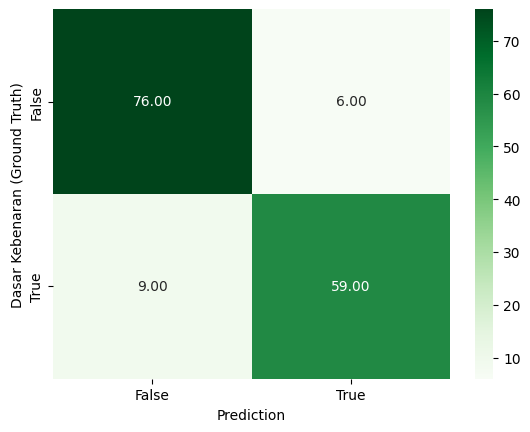

In [32]:
#-- Training --
id3_tree=build_tree_ID3(train)

#-- Train report --
report, matrix=generate_report(train,id3_tree)
print('\nTrain Report\n ')
print(report)


#-- Test Report --
report, matrix=generate_report(tes, id3_tree)
print('\n Tes Report\n ')
print(report)
plot_matrix(matrix)

## Training dan Evaluasi
## C4.5


Train Report

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       418
        True       0.97      0.96      0.97       432

    accuracy                           0.97       850
   macro avg       0.97      0.97      0.97       850
weighted avg       0.97      0.97      0.97       850



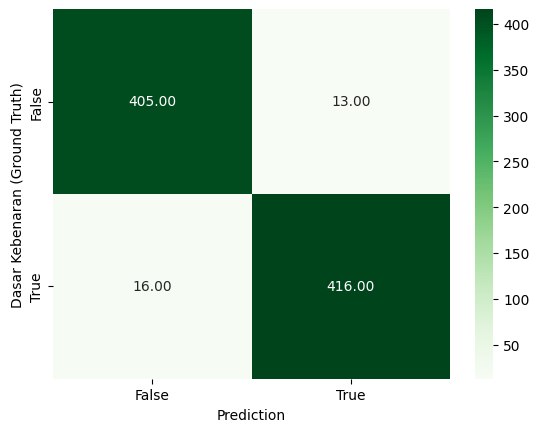


 Test Report

              precision    recall  f1-score   support

       False       0.90      0.93      0.92        82
        True       0.91      0.88      0.90        68

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.91       150
weighted avg       0.91      0.91      0.91       150



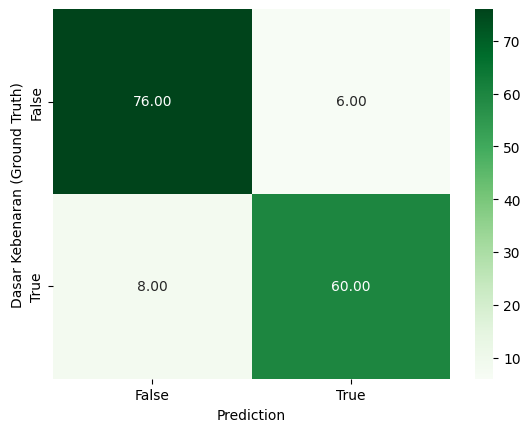

In [74]:
#Training

c4_5_tree = build_tree_C4_5(train)
#print(train)
# Train report
report, matrix = generate_report(train, c4_5_tree)
print('\nTrain Report\n')
print(report)
plot_matrix(matrix)


# Test report
report, matrix = generate_report(tes, c4_5_tree)
print('\n Test Report\n')
print(report)
plot_matrix(matrix)


In [78]:
def accuracy(data, tree):
  prediction=[]
  actual=data.iloc[:,-1]
  for index,row in data.iterrows():
    row=row.drop('will_go_to_college',axis=0)
    pre=predict_decision_tree(row,tree)
    prediction.append(pre)

  prediction=np.array(prediction)
  accu=(prediction==actual).sum()/actual.shape[0]
  return accu

In [86]:
seed_data=[]
for i in range(1,100):
  '''
  seed_data=['seed','id3_acc','c4.5_acc']
  '''

  X=df
  Y=df.iloc[:,-1]
  train,tes,_,_ =train_test_split(X,Y, test_size=0.1, random_state=i)

  id3=build_tree_ID3(train)
  c4_5_tree=build_tree_C4_5(train)

  accu_id3=accuracy(tes, id3)
  accu_c45=accuracy(tes,c4_5_tree)

  seed_data.append([i, accu_id3, accu_c45])


In [87]:
seed_data

[[1, 0.86, 0.87],
 [2, 0.85, 0.83],
 [3, 0.87, 0.87],
 [4, 0.81, 0.82],
 [5, 0.83, 0.82],
 [6, 0.87, 0.87],
 [7, 0.87, 0.85],
 [8, 0.89, 0.88],
 [9, 0.86, 0.86],
 [10, 0.86, 0.86],
 [11, 0.9, 0.86],
 [12, 0.83, 0.84],
 [13, 0.85, 0.85],
 [14, 0.87, 0.88],
 [15, 0.84, 0.84],
 [16, 0.81, 0.84],
 [17, 0.84, 0.84],
 [18, 0.86, 0.86],
 [19, 0.89, 0.9],
 [20, 0.8, 0.78],
 [21, 0.82, 0.84],
 [22, 0.87, 0.84],
 [23, 0.89, 0.89],
 [24, 0.78, 0.77],
 [25, 0.87, 0.88],
 [26, 0.79, 0.83],
 [27, 0.84, 0.83],
 [28, 0.83, 0.81],
 [29, 0.89, 0.89],
 [30, 0.8, 0.78],
 [31, 0.89, 0.89],
 [32, 0.87, 0.87],
 [33, 0.8, 0.8],
 [34, 0.85, 0.85],
 [35, 0.84, 0.84],
 [36, 0.85, 0.84],
 [37, 0.86, 0.83],
 [38, 0.8, 0.81],
 [39, 0.87, 0.86],
 [40, 0.83, 0.81],
 [41, 0.9, 0.88],
 [42, 0.84, 0.82],
 [43, 0.87, 0.87],
 [44, 0.88, 0.89],
 [45, 0.86, 0.84],
 [46, 0.86, 0.87],
 [47, 0.89, 0.85],
 [48, 0.87, 0.89],
 [49, 0.79, 0.8],
 [50, 0.87, 0.86],
 [51, 0.88, 0.84],
 [52, 0.83, 0.81],
 [53, 0.86, 0.84],
 [54, 0.87,

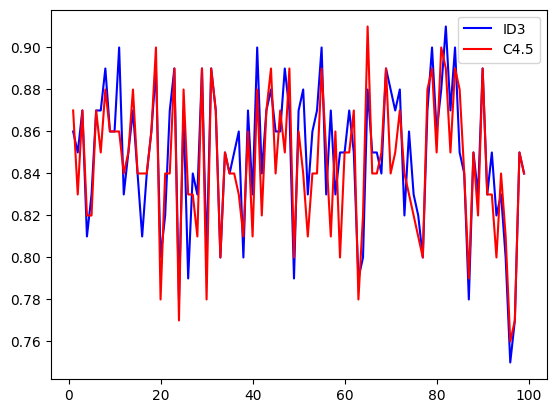

In [88]:
seed_data=np.array(seed_data)
plt.plot(seed_data[:,0],seed_data[:,1],color='blue')
plt.plot(seed_data[:,0],seed_data[:,2],color='red')
plt.legend(['ID3','C4.5'])
plt.show()

In [89]:
seed_data[:,1].mean(),seed_data[:,2].mean()

(0.848989898989899, 0.8444444444444442)

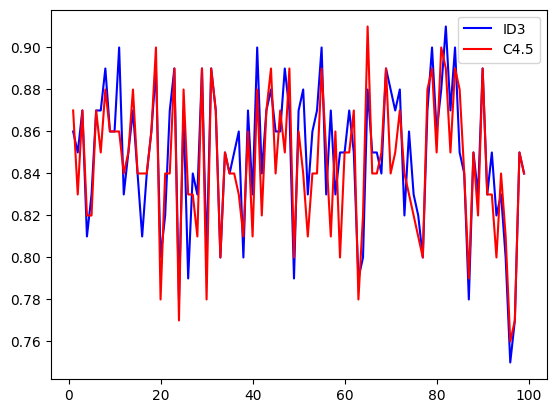

In [91]:

plt.plot(seed_data[:, 0], seed_data[:, 1], color = 'blue')
plt.plot(seed_data[:, 0], seed_data[:, 2], color = 'red')
plt.legend(['ID3', 'C4.5'])
plt.show()